In [310]:
import pandas as pd
import numpy as np
import datetime
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols #for linear regression
import seaborn as sns #for heatmap
import statsmodels.api as sm
from scipy import stats
from sklearn.metrics import r2_score #R-squared
from sklearn.model_selection import train_test_split #for train and test split
from statsmodels.api import qqplot 
from scipy.stats import shapiro,ttest_ind
from statsmodels.stats.diagnostic import het_breuschpagan,linear_rainbow  
from sklearn import linear_model
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import statsmodels.tools.tools as smt
import statsmodels.stats.outliers_influence as smo

# 1st Question
Firstly, I would look at the log likelihood number which shows the likelihood that the data is fitted in the model. The higher the number, the probability of the model having more accurate results is high.

Secondly, I would do an AIC or BIC test, which shows the prediction error, and the lower the value, the better the model

Thirdly, I can visually and through python, do a backtesting check and see the performance of each model

Lastly, I would check the R^2 and the adjusted R^2

These are all statistical analysis though. Further analysis must be conducted visually and manually such as looking into to the data, understanding its pros and cons, the advantages and disadvantages of our models, and see which one of them would work best. It also depends on the situation and the circumstances. Hence, we need to clearly understand the data, clearly understand the mechanics behind our models, and only after that conclude which model would work best.

I would create different statistical analysis models and do tests on them. Based on the tests that needs to be done on each type of model (for example for OLS we need to check normality), and based on what is mentioned above. I would compare all of my models and choose which one I would think is best

In [311]:
dataset = pd.read_csv("C:/Users/Dell Inspiron14 7000/OneDrive/Desktop/py-test-1/train_OwBvO8W/historical_volume.csv")
dataset = dataset.astype({'YearMonth':'string'})
dataset['date'] = dataset['YearMonth'].str.slice(0, 4)+'-'+dataset['YearMonth'].str.slice(4, 6)
dataset = dataset.drop('YearMonth',axis=1)
dataset = dataset.drop('Agency',axis=1)
dataset = dataset.drop('SKU',axis=1)
dataset = dataset.groupby('date')['Volume'].sum().reset_index()
dataset.set_index("date", inplace = True)
dataset.index = pd.DatetimeIndex(dataset.index).to_period('M')
print(dataset)

                Volume
date                  
2013-01  420800.266143
2013-02  458964.024450
2013-03  523473.886725
2013-04  548346.898425
2013-05  595946.388375
2013-06  536045.054100
2013-07  518362.092975
2013-08  523649.223450
2013-09  459425.011575
2013-10  499158.987715
2013-11  457547.261180
2013-12  591422.108985
2014-01  425281.348833
2014-02  491167.560532
2014-03  550482.295050
2014-04  623885.820375
2014-05  532731.601200
2014-06  520163.890200
2014-07  507000.543000
2014-08  528069.096750
2014-09  489186.618900
2014-10  491608.431300
2014-11  449440.527900
2014-12  587976.765150
2015-01  420653.713500
2015-02  434735.389350
2015-03  581874.998550
2015-04  578905.651350
2015-05  568011.101550
2015-06  525318.489450
2015-07  548704.289850
2015-08  537363.111150
2015-09  517183.152450
2015-10  484754.610000
2015-11  468572.242200
2015-12  607256.953350
2016-01  399220.311450
2016-02  450277.447050
2016-03  551677.911000
2016-04  567703.623750
2016-05  596570.375400
2016-06  56

Here, we have aggregated the products and the companies' volume to forecast the demand

# Second Question
The most common used non ML model is the ARIMA family, including AR, MA, ARIMA, SARIMA, etc (although SARIMA could be also cosidered as an ML model), and here we would use the SARIMA model which controls for seasonality. The S part means seasonality, in which we set the parameters so the model would understand the frequency of the data. The AR part, which translates to autoregresive, and is the lags of the dependent variable. Lastly, the MA part which means moving average, which gives us the means of the past errors. Because it is a regression, and regressions should be linear, that's why the most prominent disadvantage is that it can only capture linear relationships. As for the advantages, it can control seasonality, it can control for past errors, and most importantly ,it is very interpertable.

We can also use the holt winters' seasnality filter, which we can run on our data set after the itterations the filter reports three parameteres, exponential smoothing parameter, the trend parameter, and the seasonality parameter. With those parameters, we can forecast as many periods as we want. The disadvantage is that it is not interpertable, and the advantage is that it is very fast, it can work on few observations unlike other types of regressions, and its easily manipulated.

We can do lasso, which looks at set of independent variables, and chooses the ones that are more correlated with the dependent variable (out of zero variable). Lasso reports AIC, BIC, and out of sampled R^2 from which we can choose any of the criteria and get the set of variables to do the forecasting. The disadvantage is that it does not group the variables into eachother and instead has more of a sequential way of choosing. As for the advantages, it can work on linear, non linear, logistics, and generally broader types of data.

We can do the garch model. However, they generally use this for financial econometrics. The reason for that is because the Garch model is used when the volatility of the variance is high. Generally, that is the case for, for example, the stock market.

As for ML/DL model, we can do Q deep learning, recurrent neural networks, and monte carlo simulation.

For Neural networks for example, the advantages is that it understands and learns both linear and non-linear relationships, it can support learning even in the presence of missing values and more. However, it is very hard, to almost impossible to interpret the findings (depending on our data and its complexities), and it is difficult to manipulate it if needed.

It should also be mentioned that VAR family is also very famous and generally used. However, for this model, it would not be necessary since the method is suitable for multivariate time series without trend and seasonal components.

Lastly, some of the other tests that I generally use for which I am ignoring for this assignment (because I think SARIMA would work best for this assignment) include decision trees, random forrest, XGBoost. The reason why I am ignoring them is because I believe if ARIMA could be used, it is best to stick to it since we can interpret it and fully understand everything.

#### We will work with the SARIMA model, since this model suits best and its widely acknolwedged.

### Feature Engineering
For feature engineering, we will first run a dicky fuller test we would show if the data is stationary or not. If it is not stationary, then we should take at least the first difference in order to have more accurate regression results.

Furthermore, for the dicky fuller test, we should find the optimal lag order.

We can detrend the data set so the model becomes more stationary. However, for our model, it might not be necessary because the trend here might help to forecast the demand even better.

Moreover, there are many macroeconomic variables that could help to forecast such as unemployment rate, consumer confidence index, inflation, etc which we would need to download the data and add it to our current data. However, we are not doing so because we do not know in which country this data is from and sadly, as much I would have loved so, Beeristan does not exist.

We will only check for stationarity, and if we see that our variable is not stationary, then we would take out the first difference. The reason why we do not do further feature engineering, is because we have a lienar data set and further engineering may result in an unnecessary manipulation of data where the data could lose its meaning.

In [270]:
#perform augmented Dickey-Fuller test
adfuller(dataset)

(-1.053590790496304,
 0.7332203127388518,
 11,
 48,
 {'1%': -3.5745892596209488,
  '5%': -2.9239543084490744,
  '10%': -2.6000391840277777},
 1135.3764521514158)

here we see that our data is not stationary, because the t-stat is higher than our critical values. Moreover, over P-value is 0.73 meaning that it is not stationary. Hence, we fail to reject the null hypothesis that our data is not stationary.

In [271]:
diff = dataset.diff()
diff.dropna(subset = ["Volume"], inplace=True)
diff
adfuller(diff)

(-13.528210630254707,
 2.6529304782660554e-25,
 10,
 48,
 {'1%': -3.5745892596209488,
  '5%': -2.9239543084490744,
  '10%': -2.6000391840277777},
 1112.6981921011209)

As we can see, after taking the first differene, our T-statistics turned to -13, which is lower than all of our critical values, which means our data set is now finally stationary and now we can move on and use it for our SARIMA moddel

In [272]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from random import random

# define model configuration
my_order = (1, 1, 1)
my_seasonal_order = (1, 0, 1, 12)
# define model
model = SARIMAX(dataset['Volume'] ,order=my_order,seasonal_order=my_seasonal_order)
results=model.fit()
print(results)

                Volume       forecast
date                                 
2013-01  420800.266143       0.000000
2013-02  458964.024450  320988.008678
2013-03  523473.886725  441219.671495
2013-04  548346.898425  506344.093302
2013-05  595946.388375  540865.025477
2013-06  536045.054100  583784.909393
2013-07  518362.092975  549512.109047
2013-08  523649.223450  523773.079501
2013-09  459425.011575  522945.782003
2013-10  499158.987715  474178.578281
2013-11  457547.261180  495479.842585
2013-12  591422.108985  437422.516880
2014-01  425281.348833  681074.978341
2014-02  491167.560532  504051.401936
2014-03  550482.295050  502930.529861
2014-04  623885.820375  547547.613797
2014-05  532731.601200  621204.929773
2014-06  520163.890200  538951.823536
2014-07  507000.543000  515672.025882
2014-08  528069.096750  510552.763088
2014-09  489186.618900  504391.056741
2014-10  491608.431300  505405.630950
2014-11  449440.527900  481929.453063
2014-12  587976.765150  496355.955660
2015-01  420

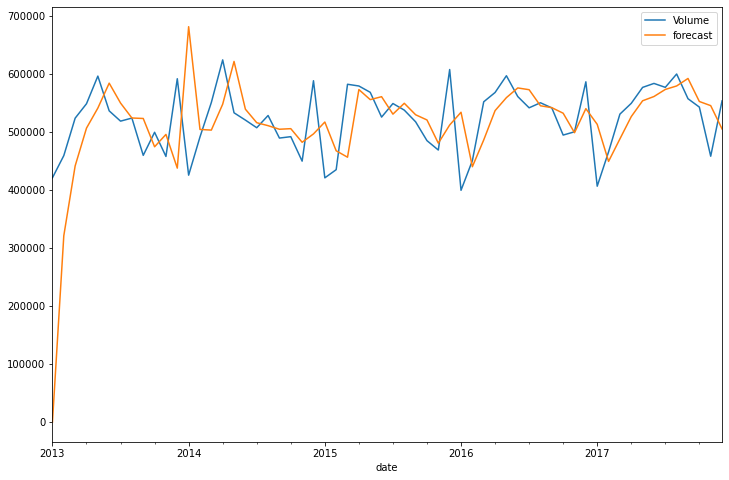

In [273]:
#Testing the fitted model.
dataset['forecast']=results.predict(start=dataset.index[0],end=dataset.index[-1]) 
dataset[['Volume','forecast']].plot(figsize=(12,8))
print(dataset)

2018-01
                Volume       forecast
2013-01  420800.266143            NaN
2013-02   458964.02445            NaN
2013-03  523473.886725            NaN
2013-04  548346.898425            NaN
2013-05  595946.388375            NaN
...                ...            ...
2017-11   457914.41295            NaN
2017-12     553316.088            NaN
2018-01            NaN  484193.524812
2018-02            NaN  504281.090220
2018-03            NaN  523580.677192

[63 rows x 2 columns]


<AxesSubplot:>

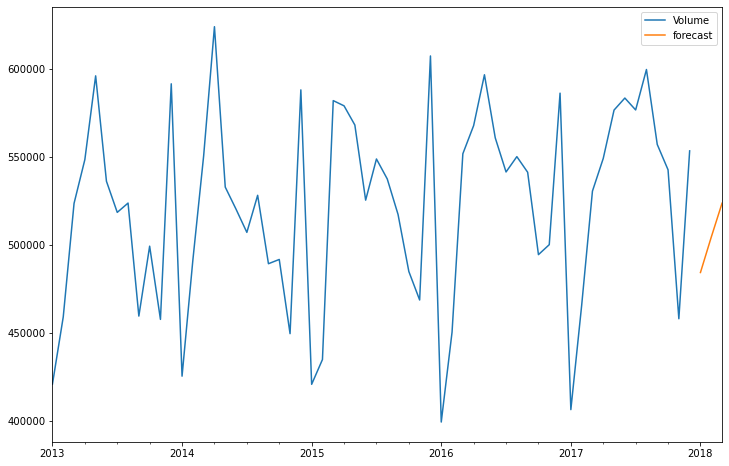

In [274]:
#Testing the fitted model.
from pandas.tseries.offsets import DateOffset

pred_date=[datetime.datetime.strptime(dataset.index[-1].strftime('%Y-%m'),"%Y-%m") + DateOffset(months=x)for x in range(1,4)]
print(pred_date[0].to_period(freq='M'))

for i in range(len(pred_date)):
    pred_date[i] = pred_date[i].to_period(freq='M')


pred_date = pd.DataFrame(index=pred_date[0:],columns=dataset.columns)
data=pd.concat([dataset,pred_date], axis=0)
data['forecast']=results.predict(start=60,end= 63) 
print(data)
data[['Volume','forecast']].plot(figsize=(12,8))


### Interpretation
When we compare our forecasted values that we got through our SARIMA model, with last years', we can see that the year to year change increased, where we predict our volume of sales to be higher.

When we compare the volume of sales of the predicted 3 months with the previous quarter, we see that the volume of sales is dropping. However, while analyzing the graph, we can construe that the decrease of sales in the first 3 months of each year is very cyclical and happens every year. Hence, it should not be a bad sign.

In [275]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 60 entries, 2013-01 to 2017-12
Freq: M
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Volume    60 non-null     float64
 1   forecast  60 non-null     float64
dtypes: float64(2)
memory usage: 3.5 KB


In [276]:
dataset.head(20)

,Volume,forecast
date,,
2013-01,420800.266143,0.000000
2013-02,458964.024450,320988.008678
2013-03,523473.886725,441219.671495
2013-04,548346.898425,506344.093302
2013-05,595946.388375,540865.025477
2013-06,536045.054100,583784.909393
2013-07,518362.092975,549512.109047
2013-08,523649.223450,523773.079501
2013-09,459425.011575,522945.782003


# Question 4
For this problem, I would do time series analysis of sales of each SKU, visually analyze how it is behaving, whether it is increasing or decreasing yearly. Since we do not have other variables, our interpretation is limited only to time series. However, it would have been better if we had more information on the variables, and if we had even more variables to understand why the sale of each SKU is increasing/decreasing

In [277]:
dataset_new = pd.read_csv("C:/Users/Dell Inspiron14 7000/OneDrive/Desktop/py-test-1/train_OwBvO8W/historical_volume.csv")
dataset_new = dataset_new.astype({'YearMonth':'string'})
dataset_new['date'] = dataset_new['YearMonth'].str.slice(0, 4)
dataset_new = dataset_new.drop('YearMonth',axis=1)
rslt_df = dataset_new[dataset_new['date'].isin(['2017', '2016'])]

sku = rslt_df["SKU"].unique()
column_names = ["SKU", "mean1", "mean2"]

my_data = pd.DataFrame(columns = column_names)
for i in sku:
    y1 = rslt_df[rslt_df['SKU'].isin([i])]
    x1 = y1[y1['date'].isin(['2016'])]
    x2 = y1[y1['date'].isin(['2017'])]
    mean1 = x1[["Volume"]].mean()
    mean2 = x2[["Volume"]].mean()
    my_data.loc[i]=[i,int(mean1),int(mean2)]
 
   
my_data

,SKU,mean1,mean2
SKU_01,SKU_01,3124,2990
SKU_02,SKU_02,2343,2427
SKU_05,SKU_05,1191,1271
SKU_22,SKU_22,7,2
SKU_07,SKU_07,32,25
SKU_04,SKU_04,1088,1077
SKU_03,SKU_03,2046,2121
SKU_14,SKU_14,4,1
SKU_21,SKU_21,1,4
SKU_18,SKU_18,3,2


### Interpretation
The reason why I compared the last two years was to see what is the consumer habbit currently. To see the volume of sales of each SKU, and also to see whether it is decreasing or increasing.
As we can see above, SKU1, SKU2, SKU5, SKU4, and SKU3 have the highest number of sales. I would recommend the following: SKU2 and SKU3 have the second highest and third highest number of sales, and it is increasing year by year. Hence, two of my choices would be them.
Although the sales of SKU1 is decreasing, the volume is too large to ignore. Thus, my third choice would be SKU1

In [278]:
dataset_new.head()

,Agency,SKU,Volume,date
0,Agency_22,SKU_01,52.2720,2013
1,Agency_22,SKU_02,110.7000,2013
2,Agency_58,SKU_23,0.0000,2013
3,Agency_48,SKU_07,28.3200,2013
4,Agency_22,SKU_05,238.5387,2013


# Question 5
In this situation. Since we do not have more information. I would do a simple K-fold validation where I would randomize the data, split it into random groups (k groups), divide them into test and train datasets, run them and analyze the evaluation.
Other methods that I can use include learning rate, Dropout Regularization, and use random search algorithm.

# 6th Question

In [312]:
dataset= pd.read_csv("C:/Users/Dell Inspiron14 7000/OneDrive/Desktop/py-test-1/train_OwBvO8W/price_sales_promotion.csv")

In [313]:
dataset= pd.read_csv("C:/Users/Dell Inspiron14 7000/OneDrive/Desktop/py-test-1/train_OwBvO8W/price_sales_promotion.csv")
dataset = dataset.astype({'YearMonth':'string'})
dataset['date'] = dataset['YearMonth'].str.slice(0, 4)+'-'+dataset['YearMonth'].str.slice(4, 6)
dataset = dataset.drop('YearMonth',axis=1)
dataset = dataset.drop('Agency',axis=1)
dataset = dataset.drop('SKU',axis=1)

dataset = dataset.drop('Sales',axis=1)
dataset = dataset.drop('Price',axis=1)

dataset.set_index("date", inplace = True)
dataset.index = pd.DatetimeIndex(dataset.index).to_period('M')
print(dataset)

         Promotions
date               
2013-01  108.067269
2013-02   76.082805
2013-03   78.212187
2013-04   88.404143
2013-05   81.361470
...             ...
2017-03   57.174577
2017-05    3.561416
2017-07   33.519028
2017-09   88.092373
2017-12    6.006356

[21000 rows x 1 columns]


In [314]:
adfuller(dataset)

(-27.919426929658602,
 0.0,
 12,
 20987,
 {'1%': -3.4306616262452376,
  '5%': -2.861677728204834,
  '10%': -2.566843308898116},
 281525.08015415334)

In [315]:
dataset= pd.read_csv("C:/Users/Dell Inspiron14 7000/OneDrive/Desktop/py-test-1/train_OwBvO8W/price_sales_promotion.csv")
dataset = dataset.astype({'YearMonth':'string'})
dataset['date'] = dataset['YearMonth'].str.slice(0, 4)+'-'+dataset['YearMonth'].str.slice(4, 6)
dataset = dataset.drop('YearMonth',axis=1)
dataset = dataset.drop('Agency',axis=1)
dataset = dataset.drop('SKU',axis=1)

dataset = dataset.drop('Promotions',axis=1)
dataset = dataset.drop('Sales',axis=1)

dataset.set_index("date", inplace = True)
dataset.index = pd.DatetimeIndex(dataset.index).to_period('M')
print(dataset)

               Price
date                
2013-01  1141.500000
2013-02  1141.500000
2013-03  1179.345820
2013-04  1226.687500
2013-05  1230.331104
...              ...
2017-03  1495.906780
2017-05  1495.906780
2017-07  1495.906780
2017-09  1495.906780
2017-12  1501.108475

[21000 rows x 1 columns]


In [316]:
adfuller(dataset)

(-11.77246323696293,
 1.0817886384080004e-21,
 46,
 20953,
 {'1%': -3.4306621319766744,
  '5%': -2.861677951709183,
  '10%': -2.566843427865315},
 293986.2398448497)

In [317]:
dataset= pd.read_csv("C:/Users/Dell Inspiron14 7000/OneDrive/Desktop/py-test-1/train_OwBvO8W/price_sales_promotion.csv")
dataset = dataset.astype({'YearMonth':'string'})
dataset['date'] = dataset['YearMonth'].str.slice(0, 4)+'-'+dataset['YearMonth'].str.slice(4, 6)
dataset = dataset.drop('YearMonth',axis=1)
dataset = dataset.drop('Agency',axis=1)
dataset = dataset.drop('SKU',axis=1)

dataset = dataset.drop('Promotions',axis=1)
dataset = dataset.drop('Price',axis=1)

dataset.set_index("date", inplace = True)
dataset.index = pd.DatetimeIndex(dataset.index).to_period('M')
print(dataset)

               Sales
date                
2013-01  1033.432731
2013-02  1065.417195
2013-03  1101.133633
2013-04  1138.283357
2013-05  1148.969634
...              ...
2017-03  1438.732203
2017-05  1499.468196
2017-07  1462.387752
2017-09  1407.814407
2017-12  1507.114831

[21000 rows x 1 columns]


In [318]:
adfuller(dataset)

(-11.777615058652797,
 1.0532778236729742e-21,
 46,
 20953,
 {'1%': -3.4306621319766744,
  '5%': -2.861677951709183,
  '10%': -2.566843427865315},
 288580.5384672755)

All of our variables are stationary. Hence, we can proceed with our statistical analysis.

In [319]:
dataset= pd.read_csv("C:/Users/Dell Inspiron14 7000/OneDrive/Desktop/py-test-1/train_OwBvO8W/price_sales_promotion.csv")
dataset = dataset.astype({'YearMonth':'string'})
dataset['date'] = dataset['YearMonth'].str.slice(0, 4)+'-'+dataset['YearMonth'].str.slice(4, 6)
dataset = dataset.drop('YearMonth',axis=1)
dataset = dataset.drop('Agency',axis=1)
dataset = dataset.drop('SKU',axis=1)

dataset = dataset.drop('Price',axis=1)

dataset.set_index("date", inplace = True)
dataset.index = pd.DatetimeIndex(dataset.index).to_period('M')
print(dataset)

               Sales  Promotions
date                            
2013-01  1033.432731  108.067269
2013-02  1065.417195   76.082805
2013-03  1101.133633   78.212187
2013-04  1138.283357   88.404143
2013-05  1148.969634   81.361470
...              ...         ...
2017-03  1438.732203   57.174577
2017-05  1499.468196    3.561416
2017-07  1462.387752   33.519028
2017-09  1407.814407   88.092373
2017-12  1507.114831    6.006356

[21000 rows x 2 columns]


In [320]:
Y = dataset.Sales
X = dataset.drop('Sales', axis=1)
X = sm.add_constant(X)

In [321]:
X

,const,Promotions
date,,
2013-01,1.0,108.067269
2013-02,1.0,76.082805
2013-03,1.0,78.212187
2013-04,1.0,88.404143
2013-05,1.0,81.361470
...,...,...
2017-03,1.0,57.174577
2017-05,1.0,3.561416
2017-07,1.0,33.519028


In [322]:
#now we do regression
model = sm.OLS(Y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     734.6
Date:                Fri, 27 May 2022   Prob (F-statistic):          4.78e-159
Time:                        15:25:07   Log-Likelihood:            -1.6334e+05
No. Observations:               21000   AIC:                         3.267e+05
Df Residuals:                   20998   BIC:                         3.267e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1189.9635      4.904    242.666      0.000    1180.352    1199.575
Promotions     0.4197      0.015     27.104      0.000       0.389       0.450
==============================================================================
Omnibus:                     4016.628   Durbin-Watson:                   0.256
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            68428.234
Skew:                          -0.441   Prob(JB):                         0.00
Kurtosis:                      11.799   Cond. No.                         389.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [323]:
pd.set_option('display.max_columns', 8)
print('== Inverted Correlation Matrix ==')
print('')
print(pd.DataFrame(np.linalg.inv(dataset.corr()), index=dataset.columns, columns=dataset.columns))

== Inverted Correlation Matrix ==

               Sales  Promotions
Sales       1.034986   -0.190289
Promotions -0.190289    1.034986


C:\Users\Dell Inspiron14 7000\AppData\Local\Temp\ipykernel_6648\942545073.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + ['Price', 'Sales', 'Promotions'])
C:\Users\Dell Inspiron14 7000\AppData\Local\Temp\ipykernel_6648\942545073.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + ['Price', 'Sales', 'Promotions'])


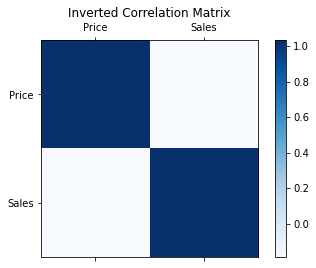

In [324]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(np.linalg.inv(dataset.corr()), cmap='Blues')
fig.colorbar(cax)
ax.set_xticklabels([''] + ['Price', 'Sales', 'Promotions'])
ax.set_yticklabels([''] + ['Price', 'Sales', 'Promotions'])
ax.set_title('Inverted Correlation Matrix')
plt.show()

In [325]:
ivaricor = pd.DataFrame(data=ivaricor, index=dataset.columns, columns=dataset.columns)
print(ivaricor)

                  Sales   Promotions
Sales       2421.407278  1060.481521
Promotions  1060.481521   465.849714


<AxesSubplot:>

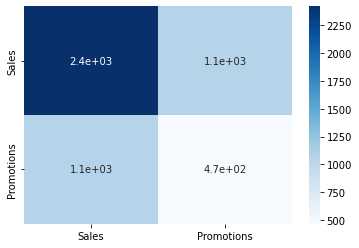

In [326]:
sns.heatmap(data=ivaricor, cmap="Blues", annot=True)

In [327]:
dataset= pd.read_csv("C:/Users/Dell Inspiron14 7000/OneDrive/Desktop/py-test-1/train_OwBvO8W/price_sales_promotion.csv")
dataset = dataset.astype({'YearMonth':'string'})
dataset['date'] = dataset['YearMonth'].str.slice(0, 4)+'-'+dataset['YearMonth'].str.slice(4, 6)
dataset = dataset.drop('YearMonth',axis=1)
dataset = dataset.drop('Agency',axis=1)
dataset = dataset.drop('SKU',axis=1)

dataset = dataset.drop('Price',axis=1)

dataset.set_index("date", inplace = True)
dataset.index = pd.DatetimeIndex(dataset.index).to_period('M')

Y = dataset.Sales
X = dataset.drop('Sales', axis=1)
X = sm.add_constant(X)

X0, X1, Y0, Y1 = train_test_split(X, Y, test_size=0.25, random_state=42)

model = sm.OLS(Y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     734.6
Date:                Fri, 27 May 2022   Prob (F-statistic):          4.78e-159
Time:                        15:25:28   Log-Likelihood:            -1.6334e+05
No. Observations:               21000   AIC:                         3.267e+05
Df Residuals:                   20998   BIC:                         3.267e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1189.9635      4.904    242.666      0.000    1180.352    1199.575
Promotions     0.4197      0.015     27.104      0.000       0.389       0.450
==============================================================================
Omnibus:                     4016.628   Durbin-Watson:                   0.256
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            68428.234
Skew:                          -0.441   Prob(JB):                         0.00
Kurtosis:                      11.799   Cond. No.                         389.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [328]:
#residuals of the model
residuals=results.resid
residuals.head(10)

date
2013-01   -201.887859
2013-02   -156.479153
2013-03   -121.656441
2013-04    -88.784396
2013-05    -75.142230
2013-09    -72.494818
2013-08    -23.398072
2013-06    -83.673121
2013-07    -64.390088
2013-10    -85.725629
Freq: M, dtype: float64

In [329]:
# now we conduct Breusch-Pagan test for hetroskedasticity
bnames = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
breush = het_breuschpagan(residuals, results.model.exog)
print(list(zip(bnames, breush)))

[('Lagrange multiplier statistic', 3097.50663308674), ('p-value', 0.0), ('f-value', 3633.094170098261), ('f p-value', 0.0)]


In [330]:
# now we conduct Rainbow test for linearity to see if our model is linear
# The null hypothesis assumes linearity
rnames=["fstat", "p-value"]
rainbow=linear_rainbow(results)
print(list(zip(rnames, rainbow)))

[('fstat', 3.3616097270112646), ('p-value', 0.0)]


C:\panda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


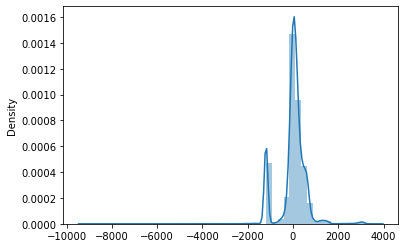

In [331]:
#now we check for normality
#distribution of residuals
sns.distplot(residuals)
plt.show()

We can clearly see issues that the data is not normally distributed and the data is not homoskedastic. We will changing the promotion variable into logarithmic to see if the normality issue is fixed.

In [332]:
dataset= pd.read_csv("C:/Users/Dell Inspiron14 7000/OneDrive/Desktop/py-test-1/train_OwBvO8W/price_sales_promotion.csv")
dataset = dataset.astype({'YearMonth':'string'})
dataset['date'] = dataset['YearMonth'].str.slice(0, 4)+'-'+dataset['YearMonth'].str.slice(4, 6)
dataset = dataset.drop('YearMonth',axis=1)
dataset = dataset.drop('Agency',axis=1)
dataset = dataset.drop('SKU',axis=1)

dataset = dataset.drop('Price',axis=1)

dataset = dataset[dataset['Promotions'] != 0]
dataset['log_Promotions'] = np.log(dataset['Promotions'])
dataset = dataset.drop('Promotions',axis=1)

dataset.set_index("date", inplace = True)
dataset.index = pd.DatetimeIndex(dataset.index).to_period('M')

Y = dataset.Sales
X = dataset.drop('Sales', axis=1)
X = sm.add_constant(X)

X0, X1, Y0, Y1 = train_test_split(X, Y, test_size=0.25, random_state=42)

model = sm.OLS(Y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     28.05
Date:                Fri, 27 May 2022   Prob (F-statistic):           1.20e-07
Time:                        15:25:36   Log-Likelihood:            -1.2951e+05
No. Observations:               17739   AIC:                         2.590e+05
Df Residuals:                   17737   BIC:                         2.590e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1370.5954     13.364    102.560      0.000    1344.401    1396.790
log_Promotions    13.8264      2.611      5.296      0.000       8.709      18.944
==============================================================================
Omnibus:                    11178.833   Durbin-Watson:                   0.261
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           272308.738
Skew:                           2.622   Prob(JB):                         0.00
Kurtosis:                      21.464   Cond. No.                         26.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\panda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


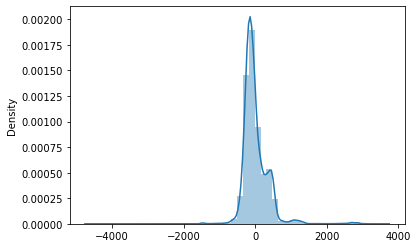

In [333]:
#now we check for normality
#distribution of residuals

#residuals of the model
residuals=results.resid
residuals.head(10)


sns.distplot(residuals)
plt.show()

The data is already more normally distributed, and we can clearly see this visually. This is due to the fact that we took the logarithmic version of the variable

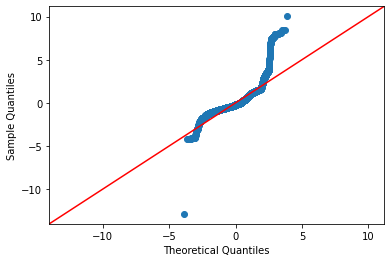

In [308]:
qqplot(residuals,fit=True, line='45')
plt.show()

In [309]:
#to further check for normality we conduct normality test
#Shapiro-Wilk normality test. 
#The null-hypothesis of this test is that the data was drawn from a normal distribution
snames=['The test statistic', 'p-value']
shapiro=shapiro(residuals)
print(list(zip(snames, shapiro)))

[('The test statistic', 0.7911940813064575), ('p-value', 0.0)]


C:\panda\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


### Interpretation
Our results from the correlation table and the regressions coefficient for sales and promotion, is positive. Hence, we can rely on our regression results because when we use the price variable, our R^2 was outrageously high and the coeffient's sign of promotion was negative, which made us believe that there was a multi-collinearity issue

From our regression table, we can agree with the manager who stated that increase in discount would increase sales. In more acedemic term, one unit increase in promotion, will result 0.4 unit increase in sales.

One percent increase in promotion will result in 0.4% increase in sales.

p value is smaller than 1%, 5% and 10% so we reject the null hypothesis for all of our tests. It should be noted that from here we should continue with robust standard error and we have to understand why all of our statistical tests failed. However, we also need more information on the data that we are working with and I am also assuming that would be out of the scope of the assignment (hopefully I am correct on that, since I could have made this assignment more complicated and made a way longer document with more tests and statistical analysis).

There are further tests that could be conducted as well, such as tests for overfitting and underfitting, endogeneity, and more. However, as per my previous assumption, I will skip through them and just answer the question that was asked.

In [334]:
dataset= pd.read_csv("C:/Users/Dell Inspiron14 7000/OneDrive/Desktop/py-test-1/train_OwBvO8W/price_sales_promotion.csv")
dataset = dataset.astype({'YearMonth':'string'})
dataset['date'] = dataset['YearMonth'].str.slice(0, 4)+'-'+dataset['YearMonth'].str.slice(4, 6)
dataset = dataset.drop('YearMonth',axis=1)
dataset = dataset.drop('Agency',axis=1)
dataset = dataset.drop('SKU',axis=1)

dataset = dataset.drop('Price',axis=1)
dataset['Promotions_sq'] = dataset['Promotions']**2

dataset.set_index("date", inplace = True)
dataset.index = pd.DatetimeIndex(dataset.index).to_period('M')
print(dataset)

               Sales  Promotions  Promotions_sq
date                                           
2013-01  1033.432731  108.067269   11678.534629
2013-02  1065.417195   76.082805    5788.593217
2013-03  1101.133633   78.212187    6117.146195
2013-04  1138.283357   88.404143    7815.292500
2013-05  1148.969634   81.361470    6619.688801
...              ...         ...            ...
2017-03  1438.732203   57.174577    3268.932255
2017-05  1499.468196    3.561416      12.683684
2017-07  1462.387752   33.519028    1123.525238
2017-09  1407.814407   88.092373    7760.266181
2017-12  1507.114831    6.006356      36.076312

[21000 rows x 3 columns]


In [335]:
Y = dataset.Sales
X = dataset.drop('Sales', axis=1)
X = sm.add_constant(X)

In [336]:
#now we do regression
model = sm.OLS(Y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     880.5
Date:                Fri, 27 May 2022   Prob (F-statistic):               0.00
Time:                        15:27:42   Log-Likelihood:            -1.6285e+05
No. Observations:               21000   AIC:                         3.257e+05
Df Residuals:                   20997   BIC:                         3.257e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1110.8324      5.411    205.296      0.000    1100.227    1121.438
Promotions        0.8810      0.021     41.831      0.000       0.840       0.922
Promotions_sq -5.896e-05   1.87e-06    -31.490      0.000   -6.26e-05   -5.53e-05
==============================================================================
Omnibus:                     2741.125   Durbin-Watson:                   0.330
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            33579.949
Skew:                          -0.110   Prob(JB):                         0.00
Kurtosis:                       9.191   Cond. No.                     4.02e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.02e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Interpretation
To find the optimal for the promotion, we should run regression where we have promotion and squared promotion as regressors. Then we can manually calculate the partial derivative from which we can find how much promotion we should do.

In the first data set, we did not have any independent variables, so we used the lag terms of the dependent variable as the regressor. However, as we can see, promotion has an effect on sales. So, we woould change our SARIMA model into SARIMAX model, X meaning the independent variable, which will increase the accuracy of our forecast

# Question 9
There are many reasons why a machine learning performance drops. It is important that we thoroughly analyze the model, the data, and the circumstances that created this situation.

1) To start, it could be because lack of monitoring: The model always needs monitoring, no matter how well it works. Data changes over time, situations and circumstances change (especially as we have seen how our world change in the past 3 years). Hence, just because a model works well early on, does not mean it will work well forever. The model must be monitored and updated regularly, whether it is for minor development, complete new development of model, re-estimating the parameters, or it could be related to its variables.

2)Samlping error: Since we do not know what happened, we do not know the situation, it could simply be a sampling error. Which means the data we gathered was basically wrong from early on. Maybe our target changed and we have demographics data. Of course the ML model won't work well as efficiently. We need to train new model with our new data.

3) Model being dependent on dynamic variables: In such cases, where the dynamic variables changes significantly with time. In such cases, it is important to monitor the machine learning model frequently or try to find the reasons why it is dynamic and add new variables accoridngly. In both cases, both is recommended.

4) Outliers: Outliers generally speaking creates problems to our model. Although it sometimes necessary to add since it further explains our analysis. It is good practice to get rid of them if possible.

5) Changes in metric: Since we do not know the circumstances. Maybe the priorities of the management changed. Hence, they think the model is nor performing well even though it still is, but it is just not giving the answers they were looking for.

6) Concept Drift: If the model is, for example, fraud detection, it is at risk of for concept drift since the definition of fraud changes

7) Overfitting and underfitting issues: The model could have worked good at the start due to a fluke. However, it does not mean it was a good model from the start. Many people fall into the problem of overfitting while constructing a model. When the circumstances change, the problem of overfitting becomes more visual since the model was built for that specific data 2 years ago


Furthermore, I would highly recommend continuous learning for the model where the automated systems can continuously evaluate and retrain models, and it can be completely automated. Though this is a very difficult process and requires constant monitoring.

## Closing Notes:

Thank you for this opportunity, the assignment was not too complicated but it was a little bit time consuming (it also did not help that I was on vacation the same week that the assignment was given to me and I was out of town. Hence, I was juggling between trying to enjoy my vacation and doing the assignment).
There are many more tests that could have been done and even more analysis, and interpretations. I did not want to overcomplicate the assignment by running more tests and manipulate the data further. However, if that is needed, please let me know so since I can do more and I am willing to do so.

In case of any questions or comments please do no hesitate to let me know.